In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
from scipy.stats import multivariate_normal
from scipy.stats import norm
from numpy import random as rd
from scipy import stats

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd
import seaborn as sb

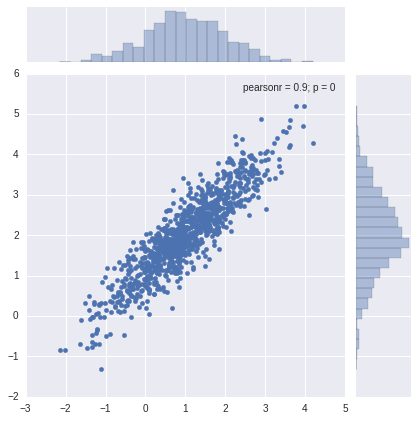

In [59]:
mean = (1.0, 2.0)
cov = [[1.0, 0.9], [0.9, 1.0]]
x = rd.multivariate_normal(mean, cov, 1000)

sb.jointplot(x[:,0], x[:,1])

def draw_cond(x, cov, mu, ind): # P(x1 | X2 = x2) at (t+ 1) ... mu at t
    ot = ind ^ 1
    mun = mu[ind] + cov[ind][ot]  * (x[ot] - mu[ot]) / cov[ot][ot]
    sig = cov[ind][ind] - cov[ind][ot] * cov[ot][ind] / cov[ot][ot]
    return rd.normal(mun, np.sqrt(sig))


def draw_cond1(x, cov, mu):
    mun = mu[0] + cov[0][1] * (x[1] - mu[1]) / cov[1][1]
    sig = cov[0][0] - cov[0][1] * cov[1][0] / cov[1][1]
    return rd.normal(mun, np.sqrt(sig))

def draw_cond2(x, cov, mu):
    mun = mu[1] + cov[1][0] * (x[0] - mu[0]) / cov[0][0]
    sig = cov[1][1] - cov[1][0] * cov[0][1] / cov[0][0]
    return rd.normal(mun, np.sqrt(sig))


def gibbs(iters):
    z = [-2.0, 5.0]
    sigma = [[1.0, 0.9], [0.9, 1.0]]
    data = []
    for i in range(iters):
        zp = list(z)
        zp[1] = draw_cond(zp, sigma, z, 0)
        zp[0] = draw_cond(zp, sigma, z, 1)
        data.append(zp)
        z = list(zp)
    return data


data = gibbs(1000000) 

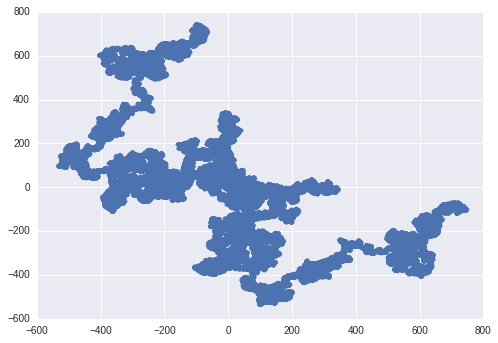

In [60]:
data = np.array(data)
plt.plot(data[:,0], data[:,1], '.')
# plt.xlim((-3, 5))
# plt.ylim((-3, 5))